# Task 6.2 Exploring Relationships - Northeast Region

### Contents
** **
A) Introduction to per-region analysis.

Step 1:  Standard prerequisites, including library loading, path setup, and data import from Task 1.

Step 2:  Picking out variables suitable for exploratory visual analysis, based on the questions defined in Task 6.1.

Step 3:  Correlation matrix heatmap (colored).

Step 4:  Scatterplots for the variables with the strongest correlations, and examination of the nature of their relationships.

Step 5:  Pair plot of the entire data set.

Step 6:  Categorical plots.

Step 7:  Revisiting questions posed in Task 1.

Step 8:  Discussion of hypothesis (or lack thereof).

# Introduction to per-region analysis.

## Analyzing the entire original dataset has failed to produce promising correlations.  This might be because the data is for too large and varied a geographical area, namely all 48 of the contiguous United States; weather is bound to vary significantly.

### According to the National Oceanic and Atmospheric Administration's (NOAA) National Centers for Environmental Information (NCEI), the area of the contiguous United States can be divided into nine distinct climatic regions, each comprising a group of states:

### 1) Northeast:  Connecticut, Delaware, Maine, Maryland, Massachusetts, New Hampshire, New Jersey, New York, Pennsylvania, Rhode Island, Vermont
### 2) Upper Midwest:  Iowa, Michigan, Minnesota, Wisconsin
### 3) Ohio Valley:  Illinois, Indiana, Kentucky, Missouri, Ohio, Tennessee, West Virginia
### 4) Southeast:  Alabama, Florida, Georgia, North Carolina, South Carolina, Virginia
### 5) Northern Rockies and Plains:  Montana, Nebraska, North Dakota, South Dakota, Wyoming
### 6) South:  Arkansas, Kansas, Louisiana, Mississippi, Oklahoma, Texas
### 7) Southwest:  Arizona, Colorado, New Mexico, Utah
### 8) Northwest:  Idaho, Oregon, Washington
### 9) West:  California, Nevada

### From https://www.ncei.noaa.gov/access/monitoring/reference-maps/us-climate-regions :
#### "Through climate analysis, National Centers for Environmental Information scientists have identified nine climatically consistent regions within the contiguous United States which are useful for putting current climate anomalies into a historical perspective (Karl and Koss, 1984)."
##### Source:  Thomas R. Karl and Walter James Koss, 1984: "Regional and National Monthly, Seasonal, and Annual Temperature Weighted by Area, 1895-1983." Historical Climatology Series 4-3, National Climatic Data Center, Asheville, NC, 38 pp.


## I have split the df_all_states_regions dataframe into a separate dataframe for each region.  This offers two advantages.
## 1) Each region can be analyzed separately for correlations and trends.
## 2) CPU-intensive operations can be run for reach region in a separate Jupyter Notebook, allowing us to take advantage of multiple CPUs for simultaneous processing, avoiding the singl-CPU bottleneck.

## This split was done in an Addendum section added to my previously-approved Jupyter Notebook for Task 6.2.
## The region to be studied in this current Notebook is the *'Northeast'* region.
## The relevant dataframe is stored in the file called *df_northeast.Task-6.2.pkl* .

# Step 1:  Standard prerequisites, including library loading, path setup, and data import for the given region.

## Standard prerequisites.  Now with additional libraries seaborn, matplotlib, and scipy.

In [1]:
# Import libraries
import pandas as pd
# I'm trying modin as a drop-in replace-- er, enhancement to pandas; supposedly it will help use more than one CPU core.
# Nope.  I'm having too much trouble getting modin installed, so it's back to plain old Pandas for now. :-(
# import modin.pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# For future reference, Exercise 6.2 introduced graphical libraries Bokeh and Plotly.
# import bokeh
# import plotly

In [3]:
# Starting with Exercise 4.7, import additional libraries I've discovered thanks to Lubov, especially the time library.
import time
import string
import random

In [4]:
# Import itertools to help loop through lots of things.
import itertools

In [5]:
# I want to convert Date-Timestamps into UNIX Epoch time for analysis.
from datetime import datetime

In [6]:
# Set a PATH variable.

In [7]:
# Linux PATH, local - Sadly, my Linux system with 8GB of total RAM could not import the full dataset.
# I have moved to an AWS EC2 instance that should be able to handle this.

In [8]:
## path = (r'~/careerfoundry/tasks/data-immersion/Achievement6/Project/02-Data/Original-Data/US-Weather-Events.2016-2021/www.kaggle.com/datasets/sobhanmoosavi/us-weather-events')

### # Oh, wow, matplotlib.pyplot.savefig function does not expand the tilde (~) reference in directory paths.  LAME. :(

In [9]:
path = (r'/home/ubuntu/careerfoundry/tasks/data-immersion/Achievement6/Project/')

In [10]:
# windoze PATH - The windoze laptop I bought for Excel and Tableau also has 16GB of RAM.

In [11]:
## path = (r'C:\Users\emccc\OneDrive\Documents\CareerFoundry\Achievement-4\Instacart-Basket-Analysis')

## Load our digested data for the region.

In [12]:
region_code = 'northeast'

In [13]:
#print(os.path.join(path, '02-Data', 'Prepared-Data', 'df_northeast.Task-6.2.pkl'))
print(os.path.join(path, '02-Data', 'Prepared-Data', 'df_' + region_code + '.Task-6.2.pkl'))

/home/ubuntu/careerfoundry/tasks/data-immersion/Achievement6/Project/02-Data/Prepared-Data/df_northeast.Task-6.2.pkl


In [14]:
df = pd.read_pickle(os.path.join(path, '02-Data','Prepared-Data', 'df_northeast.Task-6.2.pkl'))

In [15]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878241 entries, 34022 to 7418543
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   EventId                         878241 non-null  object 
 1   Type                            878241 non-null  object 
 2   Severity                        878241 non-null  object 
 3   StartTime(UTC)                  878241 non-null  object 
 4   EndTime(UTC)                    878241 non-null  object 
 5   Precipitation(in)               878241 non-null  float64
 6   TimeZone                        878241 non-null  object 
 7   AirportCode                     878241 non-null  object 
 8   LocationLat                     878241 non-null  float64
 9   LocationLng                     878241 non-null  float64
 10  County                          878241 non-null  object 
 11  State                           878241 non-null  object 
 12  StartTime(E

In [16]:
df.head()

EventId  Type Severity       StartTime(UTC)         EndTime(UTC)  \
34022  W-34438  Snow    Light  2016-01-01 22:40:00  2016-01-02 00:22:00   
34023  W-34439  Snow    Light  2016-01-02 07:54:00  2016-01-02 08:54:00   
34024  W-34440  Snow    Light  2016-01-02 10:54:00  2016-01-02 11:54:00   
34025  W-34441  Snow    Light  2016-01-04 02:54:00  2016-01-04 03:54:00   
34026  W-34442  Snow    Light  2016-01-04 04:54:00  2016-01-04 05:54:00   

       Precipitation(in)    TimeZone AirportCode  LocationLat  LocationLng  \
34022                0.0  US/Eastern        KPSF      42.4269      -73.289   
34023                0.0  US/Eastern        KPSF      42.4269      -73.289   
34024                0.0  US/Eastern        KPSF      42.4269      -73.289   
34025                0.0  US/Eastern        KPSF      42.4269      -73.289   
34026                0.0  US/Eastern        KPSF      42.4269      -73.289   

          County State  StartTime(Epoch)  EndTime(Epoch)  Duration(seconds)  \
34022  Berkshire    MA        1451688000      1451694120               6120   
34023  Berkshire    MA        1451721240      1451724840               3600   
34024  Berkshire    MA        1451732040      1451735640               3600   
34025  Berkshire    MA        1451876040      1451879640               3600   
34026  Berkshire    MA        1451883240      1451886840               3600   

       Duration(hours)  PrecipitationRate(inches/hour) Disbelievable  \
34022              1.7                             0.0           TBD   
34023              1.0                             0.0           TBD   
34024              1.0                             0.0           TBD   
34025              1.0                             0.0           TBD   
34026              1.0                             0.0           TBD   

          Region  
34022  Northeast  
34023  Northeast  
34024  Northeast  
34025  Northeast  
34026  Northeast

In [17]:
df.tail()

EventId  Type Severity       StartTime(UTC)         EndTime(UTC)  \
7418539  W-7515783   Fog   Severe  2021-12-19 01:45:00  2021-12-19 10:53:00   
7418540  W-7515784  Rain    Light  2021-12-26 01:45:00  2021-12-26 02:45:00   
7418541  W-7515785  Rain    Light  2021-12-27 15:45:00  2021-12-27 18:50:00   
7418542  W-7515786  Rain    Light  2021-12-30 00:50:00  2021-12-30 10:45:00   
7418543  W-7515787  Rain    Light  2021-12-31 02:50:00  2021-12-31 10:45:00   

         Precipitation(in)    TimeZone AirportCode  LocationLat  LocationLng  \
7418539                0.0  US/Eastern        KRJD      38.9701     -75.8663   
7418540                0.0  US/Eastern        KRJD      38.9701     -75.8663   
7418541                0.0  US/Eastern        KRJD      38.9701     -75.8663   
7418542                0.0  US/Eastern        KRJD      38.9701     -75.8663   
7418543                0.0  US/Eastern        KRJD      38.9701     -75.8663   

           County State  StartTime(Epoch)  EndTime(Epoch)  Duration(seconds)  \
7418539  Caroline    MD        1639878300      1639911180              32880   
7418540  Caroline    MD        1640483100      1640486700               3600   
7418541  Caroline    MD        1640619900      1640631000              11100   
7418542  Caroline    MD        1640825400      1640861100              35700   
7418543  Caroline    MD        1640919000      1640947500              28500   

         Duration(hours)  PrecipitationRate(inches/hour) Disbelievable  \
7418539         9.133333                             0.0           TBD   
7418540         1.000000                             0.0           TBD   
7418541         3.083333                             0.0           TBD   
7418542         9.916667                             0.0           TBD   
7418543         7.916667                             0.0           TBD   

            Region  
7418539  Northeast  
7418540  Northeast  
7418541  Northeast  
7418542  Northeast  
7418543  Northeast

In [18]:
df.shape

(878241, 19)

In [19]:
df.dtypes

EventId                            object
Type                               object
Severity                           object
StartTime(UTC)                     object
EndTime(UTC)                       object
Precipitation(in)                 float64
TimeZone                           object
AirportCode                        object
LocationLat                       float64
LocationLng                       float64
County                             object
State                              object
StartTime(Epoch)                    int64
EndTime(Epoch)                      int64
Duration(seconds)                   int64
Duration(hours)                   float64
PrecipitationRate(inches/hour)    float64
Disbelievable                      object
Region                             object
dtype: object

In [20]:
df.columns

Index(['EventId', 'Type', 'Severity', 'StartTime(UTC)', 'EndTime(UTC)',
       'Precipitation(in)', 'TimeZone', 'AirportCode', 'LocationLat',
       'LocationLng', 'County', 'State', 'StartTime(Epoch)', 'EndTime(Epoch)',
       'Duration(seconds)', 'Duration(hours)',
       'PrecipitationRate(inches/hour)', 'Disbelievable', 'Region'],
      dtype='object')

In [21]:
df.describe(include='all')

EventId    Type Severity       StartTime(UTC)         EndTime(UTC)  \
count    878241  878241   878241               878241               878241   
unique   878241       7        6               549269               541783   
top     W-34438    Rain    Light  2019-01-20 07:53:00  2021-03-29 01:53:00   
freq          1  509475   530528                   20                   21   
mean        NaN     NaN      NaN                  NaN                  NaN   
std         NaN     NaN      NaN                  NaN                  NaN   
min         NaN     NaN      NaN                  NaN                  NaN   
25%         NaN     NaN      NaN                  NaN                  NaN   
50%         NaN     NaN      NaN                  NaN                  NaN   
75%         NaN     NaN      NaN                  NaN                  NaN   
max         NaN     NaN      NaN                  NaN                  NaN   

        Precipitation(in)    TimeZone AirportCode    LocationLat  \
count       878241.000000      878241      878241  878241.000000   
unique                NaN           1         203            NaN   
top                   NaN  US/Eastern        KGTB            NaN   
freq                  NaN      878241        9311            NaN   
mean             0.087902         NaN         NaN      41.902005   
std              0.273493         NaN         NaN       1.836941   
min              0.000000         NaN         NaN      38.146000   
25%              0.000000         NaN         NaN      40.616200   
50%              0.000000         NaN         NaN      41.701600   
75%              0.080000         NaN         NaN      43.116700   
max             57.290000         NaN         NaN      47.285500   

          LocationLng      County   State  StartTime(Epoch)  EndTime(Epoch)  \
count   878241.000000      878241  878241      8.782410e+05    8.782410e+05   
unique            NaN         130      11               NaN             NaN   
top               NaN  Washington      NY               NaN             NaN   
freq              NaN       23975  180464               NaN             NaN   
mean       -74.213541         NaN     NaN      1.548276e+09    1.548281e+09   
std          3.048706         NaN     NaN      5.309299e+07    5.309291e+07   
min        -80.413400         NaN     NaN      1.451624e+09    1.451625e+09   
25%        -76.411800         NaN     NaN      1.504062e+09    1.504071e+09   
50%        -74.206200         NaN     NaN      1.548302e+09    1.548309e+09   
75%        -71.756000         NaN     NaN      1.593169e+09    1.593173e+09   
max        -67.792800         NaN     NaN      1.640995e+09    1.640995e+09   

        Duration(seconds)  Duration(hours)  PrecipitationRate(inches/hour)  \
count       878241.000000    878241.000000                   878241.000000   
unique                NaN              NaN                             NaN   
top                   NaN              NaN                             NaN   
freq                  NaN              NaN                             NaN   
mean          5275.089822         1.465303                        0.170295   
std           9901.672637         2.750465                        0.643576   
min             60.000000         0.016667                        0.000000   
25%           1200.000000         0.333333                        0.000000   
50%           3000.000000         0.833333                        0.000000   
75%           5520.000000         1.533333                        0.072000   
max         601200.000000       167.000000                       16.920000   

       Disbelievable     Region  
count         878241     878241  
unique             1          1  
top              TBD  Northeast  
freq          878241     878241  
mean             NaN        NaN  
std              NaN        NaN  
min              NaN        NaN  
25%              NaN        NaN  
50%              NaN        NaN  
75%              NaN        

In [22]:
df['State'].value_counts()

NY    180464
PA    179901
MA    107741
ME     78960
NJ     68963
MD     68003
NH     65481
VT     50133
CT     41843
RI     22387
DE     14365
Name: State, dtype: int64

# Step 2:  Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis.


## Skipping here, because this was done in my original submission for Task 6.2.

# Step 2A:  Derive a new column, StartYear, to store just the year each event started.
## This is a new step post-Task-6.2 submission, to try to help identify correlations.
## By analyzing events in a given year, we may be able to identify trends.

## First, the StartTime(UTC) column needs to be converted to the 'datetime' format.

In [23]:
df['StartTime(UTC)'] = pd.to_datetime(df['StartTime(UTC)'])

In [24]:
# Derive the new 'StartYear' column
df['StartYear'] = df['StartTime(UTC)'].dt.year

# Step 2B:  Derive more new columns.
## This is a new step post-Task-6.2 submission, to try to help identify correlations.
## By analyzing additional derived data, we may be able to identify trends.

In [25]:
# Derive a new 'StartYear-Month' column
df['StartYear-Month'] = df['StartTime(UTC)'].dt.strftime('%Y%m')
# Let's try to get corr() to see this column as something to correlate.
df['StartYear-Month'] = df['StartYear-Month'].astype('int64')

In [26]:
# Make a new column specifically for snow accumulation.
df['Snow(in)'] = 0.0
df.loc[(df['Type'] == 'Snow'), 'Snow(in)'] = df['Precipitation(in)']

In [27]:
# Make a new column specifically for rain accumulation.
df['Rain(in)'] = 0.0
df.loc[(df['Type'] == 'Rain'), 'Rain(in)'] = df['Precipitation(in)']

In [28]:
df['Rain(in)'].sort_values(ascending=False).head(20)

673554     18.04
4052554    14.24
6983759    11.37
674126     11.05
2771425    10.88
6682960    10.48
1664799     9.99
3194955     9.91
3368843     9.74
879097      9.51
1667553     9.36
870371      9.36
4192312     9.33
4021499     9.32
518712      9.06
2796668     9.03
4733938     8.52
3366591     8.45
1667507     8.22
870325      8.22
Name: Rain(in), dtype: float64

In [29]:
# Derive a new 'Month' column, regardless of Year:  we're looking for seasonality now.
df['StartMonth'] = df['StartTime(UTC)'].dt.strftime('%m')
# Let's try to get corr() to see this column as something to correlate.
df['StartMonth'] = df['StartMonth'].astype('int64')

In [30]:
df.tail()

EventId  Type Severity      StartTime(UTC)         EndTime(UTC)  \
7418539  W-7515783   Fog   Severe 2021-12-19 01:45:00  2021-12-19 10:53:00   
7418540  W-7515784  Rain    Light 2021-12-26 01:45:00  2021-12-26 02:45:00   
7418541  W-7515785  Rain    Light 2021-12-27 15:45:00  2021-12-27 18:50:00   
7418542  W-7515786  Rain    Light 2021-12-30 00:50:00  2021-12-30 10:45:00   
7418543  W-7515787  Rain    Light 2021-12-31 02:50:00  2021-12-31 10:45:00   

         Precipitation(in)    TimeZone AirportCode  LocationLat  LocationLng  \
7418539                0.0  US/Eastern        KRJD      38.9701     -75.8663   
7418540                0.0  US/Eastern        KRJD      38.9701     -75.8663   
7418541                0.0  US/Eastern        KRJD      38.9701     -75.8663   
7418542                0.0  US/Eastern        KRJD      38.9701     -75.8663   
7418543                0.0  US/Eastern        KRJD      38.9701     -75.8663   

         ... Duration(seconds) Duration(hours)  \
7418539  ...             32880        9.133333   
7418540  ...              3600        1.000000   
7418541  ...             11100        3.083333   
7418542  ...             35700        9.916667   
7418543  ...             28500        7.916667   

         PrecipitationRate(inches/hour)  Disbelievable     Region  StartYear  \
7418539                             0.0            TBD  Northeast       2021   
7418540                             0.0            TBD  Northeast       2021   
7418541                             0.0            TBD  Northeast       2021   
7418542                             0.0            TBD  Northeast       2021   
7418543                             0.0            TBD  Northeast       2021   

         StartYear-Month Snow(in) Rain(in)  StartMonth  
7418539           202112      0.0      0.0          12  
7418540           202112      0.0      0.0          12  
7418541           202112      0.0      0.0          12  
7418542           202112      0.0      0.0          12  
7418543           202112      0.0      0.0          12  

[5 rows x 24 columns]

In [31]:
df.dtypes

EventId                                   object
Type                                      object
Severity                                  object
StartTime(UTC)                    datetime64[ns]
EndTime(UTC)                              object
Precipitation(in)                        float64
TimeZone                                  object
AirportCode                               object
LocationLat                              float64
LocationLng                              float64
County                                    object
State                                     object
StartTime(Epoch)                           int64
EndTime(Epoch)                             int64
Duration(seconds)                          int64
Duration(hours)                          float64
PrecipitationRate(inches/hour)           float64
Disbelievable                             object
Region                                    object
StartYear                                  int64
StartYear-Month     

## We probably should have been aggregating rain and snow amounts this whole time.
## Let's start by getting the sums and averages for these amounts for each airport, both for a given StartYear and a given Start StartYear-Month.

In [32]:
# Example from Exercise 4.8:
# ords_prods_merge['max_order'] = ords_prods_merge.groupby(['user_id'])['order_number'].transform(np.max)

In [33]:
df['Rain-sum-AC-SY-M'] = df.groupby(['AirportCode', 'StartYear-Month'])['Rain(in)'].transform(np.sum)

In [34]:
df['Rain-sum-AC-SY'] = df.groupby(['AirportCode', 'StartYear'])['Rain(in)'].transform(np.sum)

In [35]:
df['Snow-sum-AC-SY-M'] = df.groupby(['AirportCode', 'StartYear-Month'])['Snow(in)'].transform(np.sum)

In [36]:
df['Snow-sum-AC-SY'] = df.groupby(['AirportCode', 'StartYear'])['Snow(in)'].transform(np.sum)

In [37]:
df.columns

Index(['EventId', 'Type', 'Severity', 'StartTime(UTC)', 'EndTime(UTC)',
       'Precipitation(in)', 'TimeZone', 'AirportCode', 'LocationLat',
       'LocationLng', 'County', 'State', 'StartTime(Epoch)', 'EndTime(Epoch)',
       'Duration(seconds)', 'Duration(hours)',
       'PrecipitationRate(inches/hour)', 'Disbelievable', 'Region',
       'StartYear', 'StartYear-Month', 'Snow(in)', 'Rain(in)', 'StartMonth',
       'Rain-sum-AC-SY-M', 'Rain-sum-AC-SY', 'Snow-sum-AC-SY-M',
       'Snow-sum-AC-SY'],
      dtype='object')

In [38]:
df.sort_values('Snow-sum-AC-SY', ascending=False).head()

EventId  Type Severity      StartTime(UTC)         EndTime(UTC)  \
4598024  W-4657998  Rain    Light 2018-12-21 06:55:00  2018-12-21 07:15:00   
4597466  W-4657440  Snow    Light 2018-03-16 08:15:00  2018-03-16 08:35:00   
4597464  W-4657438  Snow    Light 2018-03-14 20:55:00  2018-03-14 22:50:00   
4597463  W-4657437  Cold   Severe 2018-03-14 19:50:00  2018-03-14 20:55:00   
4597462  W-4657436  Snow    Light 2018-03-14 18:50:00  2018-03-14 19:50:00   

         Precipitation(in)    TimeZone AirportCode  LocationLat  LocationLng  \
4598024                0.0  US/Eastern        KLBE      40.2759     -79.4048   
4597466                0.0  US/Eastern        KLBE      40.2759     -79.4048   
4597464                0.0  US/Eastern        KLBE      40.2759     -79.4048   
4597463                0.0  US/Eastern        KLBE      40.2759     -79.4048   
4597462                0.0  US/Eastern        KLBE      40.2759     -79.4048   

         ...     Region StartYear  StartYear-Month  Snow(in)  Rain(in)  \
4598024  ...  Northeast      2018           201812       0.0       0.0   
4597466  ...  Northeast      2018           201803       0.0       0.0   
4597464  ...  Northeast      2018           201803       0.0       0.0   
4597463  ...  Northeast      2018           201803       0.0       0.0   
4597462  ...  Northeast      2018           201803       0.0       0.0   

         StartMonth  Rain-sum-AC-SY-M Rain-sum-AC-SY Snow-sum-AC-SY-M  \
4598024          12              0.00          20.74             0.00   
4597466           3              2.19          20.74             3.51   
4597464           3              2.19          20.74             3.51   
4597463           3              2.19          20.74             3.51   
4597462           3              2.19          20.74             3.51   

         Snow-sum-AC-SY  
4598024           27.11  
4597466           27.11  
4597464           27.11  
4597463           27.11  
4597462           27.11  

[5 rows x 28 columns]

# Step 3:  Create a correlation matrix heatmap (colored).

In [39]:
# I had already explored this a little bit in Task 6.1, but I will repeat on the smaller dataframe.

In [40]:
df.corr()

Precipitation(in)  LocationLat  LocationLng  \
Precipitation(in)                        1.000000    -0.041956     0.010094   
LocationLat                             -0.041956     1.000000     0.557007   
LocationLng                              0.010094     0.557007     1.000000   
StartTime(Epoch)                         0.008421    -0.025724    -0.000795   
EndTime(Epoch)                           0.008429    -0.025719    -0.000792   
Duration(seconds)                        0.041415     0.029576     0.016369   
Duration(hours)                          0.041415     0.029576     0.016369   
PrecipitationRate(inches/hour)           0.582638    -0.049601    -0.006023   
StartYear                                0.000922    -0.029263    -0.004331   
StartYear-Month                          0.001826    -0.028879    -0.003906   
Snow(in)                                 0.102823     0.048646     0.026095   
Rain(in)                                 0.818028    -0.047064     0.012578   
StartMonth                               0.042080     0.017339     0.019681   
Rain-sum-AC-SY-M                         0.202372    -0.110833     0.035332   
Rain-sum-AC-SY                           0.127505    -0.148713     0.034823   
Snow-sum-AC-SY-M                        -0.033240     0.208632     0.069260   
Snow-sum-AC-SY                           0.022306     0.477895     0.198653   

                                StartTime(Epoch)  EndTime(Epoch)  \
Precipitation(in)                       0.008421        0.008429   
LocationLat                            -0.025724       -0.025719   
LocationLng                            -0.000795       -0.000792   
StartTime(Epoch)                        1.000000        1.000000   
EndTime(Epoch)                          1.000000        1.000000   
Duration(seconds)                      -0.007339       -0.007152   
Duration(hours)                        -0.007339       -0.007152   
PrecipitationRate(inches/hour)          0.017262        0.017245   
StartYear                               0.984170        0.984170   
StartYear-Month                         0.987736        0.987737   
Snow(in)                               -0.008908       -0.008902   
Rain(in)                               -0.005012       -0.005004   
StartMonth                              0.185265        0.185261   
Rain-sum-AC-SY-M                        0.032068        0.032055   
Rain-sum-AC-SY                         -0.027862       -0.027873   
Snow-sum-AC-SY-M                       -0.027306       -0.027304   
Snow-sum-AC-SY                          0.025149        0.025144   

                                Duration(seconds)  Duration(hours)  \
Precipitation(in)                        0.041415         0.041415   
LocationLat                              0.029576         0.029576   
LocationLng                              0.016369         0.016369   
StartTime(Epoch)                        -0.007339        -0.007339   
EndTime(Epoch)                          -0.007152        -0.007152   
Duration(seconds)                        1.000000         1.000000   
Duration(hours)                          1.000000         1.000000   
PrecipitationRate(inches/hour)          -0.091311        -0.091311   
StartYear                               -0.003625        -0.003625   
StartYear-Month                         -0.004093        -0.004093   
Snow(in)                                 0.032613         0.032613   
Rain(in)                                 0.046931         0.046931   
StartMonth                              -0.021870        -0.021870   
Rain-sum-AC-SY-M                        -0.070033        -0.070033   
Rain-sum-AC-SY                          -0.058143        -0.058143   
Snow-sum-AC-SY-M                         0.006209         0.006209   
Snow-sum-AC-SY                          -0.025640        -0.025640   

                                PrecipitationRate(inches/hour)  StartYear  \
Precipitation(in)                             

### Here is the correlation heatmap using the code I worked out in Task 6.1.

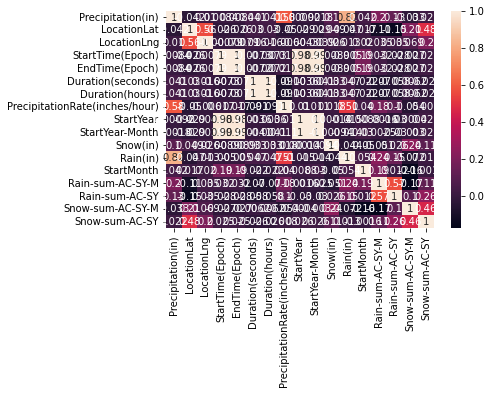

In [41]:
sns.heatmap(df.corr(), annot = True)
plt.rcParams['figure.figsize'] = (20,7)
plt.show()

### Here is the correlation heatmap using code derived from the example in the current task, Task 6.2.

#### First with raw matplotlib.

In [42]:
# NOTE:  The example from the Exercise needed to be tweaked, in order to omit from the axes
# the columns that are not amenable to correlation.

In [43]:
df.shape[1]

28

In [44]:
df.corr().shape[1]

17

In [45]:
df.columns

Index(['EventId', 'Type', 'Severity', 'StartTime(UTC)', 'EndTime(UTC)',
       'Precipitation(in)', 'TimeZone', 'AirportCode', 'LocationLat',
       'LocationLng', 'County', 'State', 'StartTime(Epoch)', 'EndTime(Epoch)',
       'Duration(seconds)', 'Duration(hours)',
       'PrecipitationRate(inches/hour)', 'Disbelievable', 'Region',
       'StartYear', 'StartYear-Month', 'Snow(in)', 'Rain(in)', 'StartMonth',
       'Rain-sum-AC-SY-M', 'Rain-sum-AC-SY', 'Snow-sum-AC-SY-M',
       'Snow-sum-AC-SY'],
      dtype='object')

In [46]:
df.corr().columns

Index(['Precipitation(in)', 'LocationLat', 'LocationLng', 'StartTime(Epoch)',
       'EndTime(Epoch)', 'Duration(seconds)', 'Duration(hours)',
       'PrecipitationRate(inches/hour)', 'StartYear', 'StartYear-Month',
       'Snow(in)', 'Rain(in)', 'StartMonth', 'Rain-sum-AC-SY-M',
       'Rain-sum-AC-SY', 'Snow-sum-AC-SY-M', 'Snow-sum-AC-SY'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Matrix')

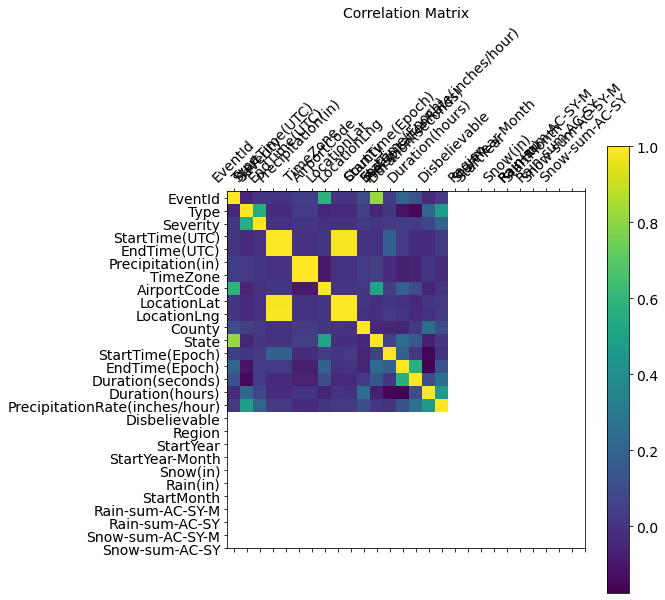

In [47]:
# Initial adaptation, with the extra columns distorting the axes.
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

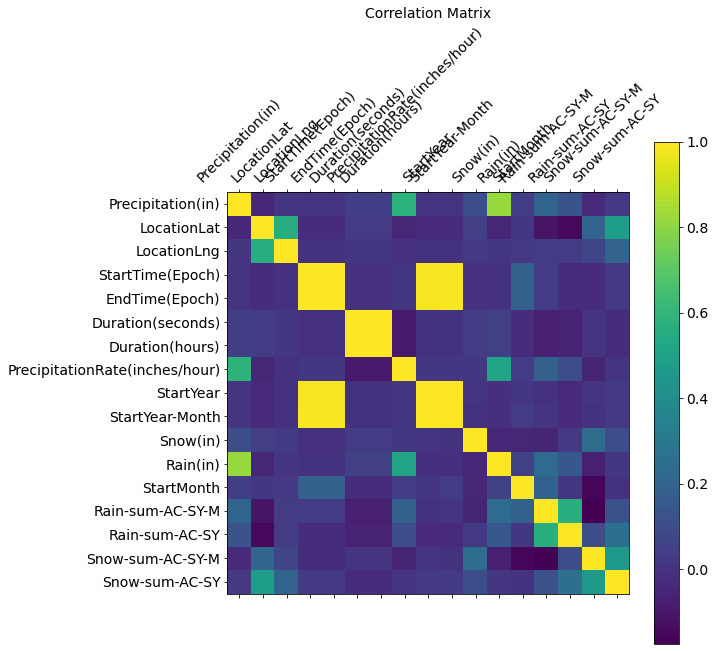

In [48]:
# A slight tweak to the plt.xticks and plt.yticks definitions removes the inappropriate columns.
f = plt.figure(figsize=(9, 9)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.corr().shape[1]), df.corr().columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df.corr().shape[1]), df.corr().columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title
# REMEMBER!  plt.show() removes the plot from memory.  Therefore, you must save the plot to a file with
# plt.savefig() first, or else your file will be blank!
#plt.savefig(os.path.join(path, '04-Analysis', 'Visualizations', 'task-6.2-correlation-heatmap-matplotlib.png'), facecolor='white')
plt.show()

#### Now with seaborn.
#### NOTE:  I'm trying to be "lazy" in creating my subset dataframe, by avoiding typing/pasting all the specific column names, like they did in the Exercice 6.2 example.  After a couple of sanity checks, I *think* it works.

In [49]:
df.columns

Index(['EventId', 'Type', 'Severity', 'StartTime(UTC)', 'EndTime(UTC)',
       'Precipitation(in)', 'TimeZone', 'AirportCode', 'LocationLat',
       'LocationLng', 'County', 'State', 'StartTime(Epoch)', 'EndTime(Epoch)',
       'Duration(seconds)', 'Duration(hours)',
       'PrecipitationRate(inches/hour)', 'Disbelievable', 'Region',
       'StartYear', 'StartYear-Month', 'Snow(in)', 'Rain(in)', 'StartMonth',
       'Rain-sum-AC-SY-M', 'Rain-sum-AC-SY', 'Snow-sum-AC-SY-M',
       'Snow-sum-AC-SY'],
      dtype='object')

In [50]:
df.corr().columns

Index(['Precipitation(in)', 'LocationLat', 'LocationLng', 'StartTime(Epoch)',
       'EndTime(Epoch)', 'Duration(seconds)', 'Duration(hours)',
       'PrecipitationRate(inches/hour)', 'StartYear', 'StartYear-Month',
       'Snow(in)', 'Rain(in)', 'StartMonth', 'Rain-sum-AC-SY-M',
       'Rain-sum-AC-SY', 'Snow-sum-AC-SY-M', 'Snow-sum-AC-SY'],
      dtype='object')

In [51]:
df_subset = df[df.corr().columns]

In [52]:
df_subset.shape

(878241, 17)

In [53]:
df_subset.head()

Precipitation(in)  LocationLat  LocationLng  StartTime(Epoch)  \
34022                0.0      42.4269      -73.289        1451688000   
34023                0.0      42.4269      -73.289        1451721240   
34024                0.0      42.4269      -73.289        1451732040   
34025                0.0      42.4269      -73.289        1451876040   
34026                0.0      42.4269      -73.289        1451883240   

       EndTime(Epoch)  Duration(seconds)  Duration(hours)  \
34022      1451694120               6120              1.7   
34023      1451724840               3600              1.0   
34024      1451735640               3600              1.0   
34025      1451879640               3600              1.0   
34026      1451886840               3600              1.0   

       PrecipitationRate(inches/hour)  StartYear  StartYear-Month  Snow(in)  \
34022                             0.0       2016           201601       0.0   
34023                             0.0       2016           201601       0.0   
34024                             0.0       2016           201601       0.0   
34025                             0.0       2016           201601       0.0   
34026                             0.0       2016           201601       0.0   

       Rain(in)  StartMonth  Rain-sum-AC-SY-M  Rain-sum-AC-SY  \
34022       0.0           1              1.39           71.63   
34023       0.0           1              1.39           71.63   
34024       0.0           1              1.39           71.63   
34025       0.0           1              1.39           71.63   
34026       0.0           1              1.39           71.63   

       Snow-sum-AC-SY-M  Snow-sum-AC-SY  
34022              0.55            6.32  
34023              0.55            6.32  
34024              0.55            6.32  
34025              0.55            6.32  
34026              0.55            6.32

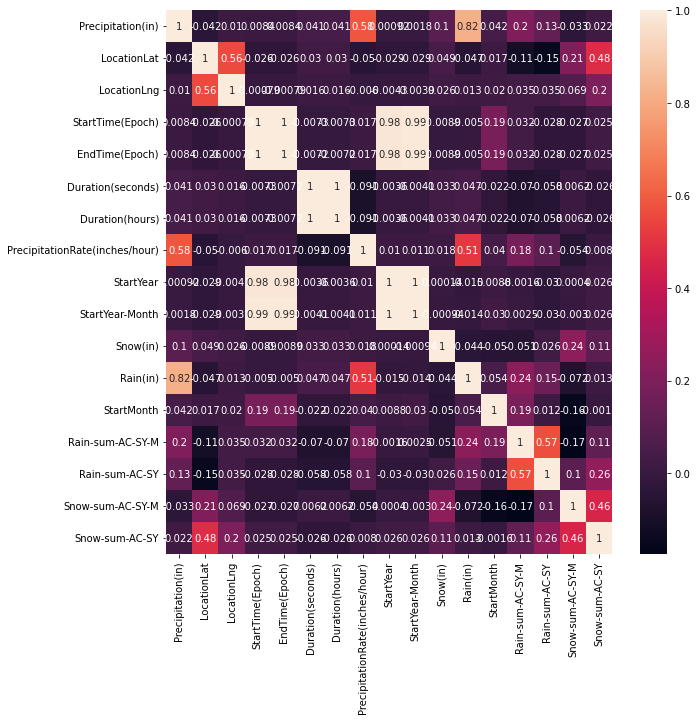

In [54]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_subset.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [55]:
# Save the seaborn correlation heatmap.
#corr.figure.savefig(os.path.join(path, '04-Analysis', 'Visualizations', 'task-6.2-correlation-heatmap-seaborn.png'), facecolor='white', bbox_inches='tight')

### Step 3a) Discuss what the coefficients in the plot mean in terms of the relationships between the variables.


### Answer:
### There don't seem to be any insightful correlations among these variables.
### Obviously, precipitation rates and precipitation totals have a strong correlation, and the various time-related variables correlate, of course.
### Other than those, though, nothing quite makes the threshold of even a weak relationship (+/- 0.1).
### The closest are slight inverse relationships that Precipitation Rate has with Latitude (-0.096) and with event Duration (-0.074); the inverse relationship with Latitude might be worth investigating, but the inverse relationship with duration is counterintuitive.

# Step 4:  Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.

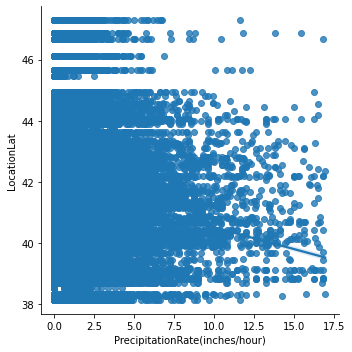

In [56]:
# Create a scatterplot for the "PrecipitationRate(inches/hour)" and "LocationLat" columns in seaborn
sns.lmplot(x = 'PrecipitationRate(inches/hour)', y = 'LocationLat', data = df_subset)
# Save the seaborn scatterplot.
#plt.savefig(os.path.join(path, '04-Analysis', 'Visualizations', 'task-6.2-correlation-scatter-PrecRate-LocLat-seaborn.png'), facecolor='white', bbox_inches='tight')

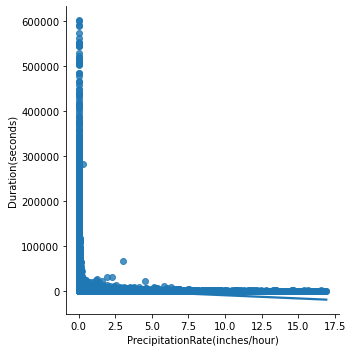

In [57]:
# Create a scatterplot for the "PrecipitationRate(inches/hour)" and "Duration(seconds)" columns in seaborn
sns.lmplot(x = 'PrecipitationRate(inches/hour)', y = 'Duration(seconds)', data = df_subset)
# Save the seaborn scatterplot.
#plt.savefig(os.path.join(path, '04-Analysis', 'Visualizations', 'task-6.2-correlation-scatter-PrecRate-DureSec-seaborn.png'), facecolor='white', bbox_inches='tight')

### Step 4a) Discuss the output in a markdown cell.

### Answer:
### There truly seems to be no linear correlation to discuss so far.
### Hopefully, once I start to investigate how the data acts over time, some good correlations will appear.

# Step 5:  Create a pair plot of the entire subset.

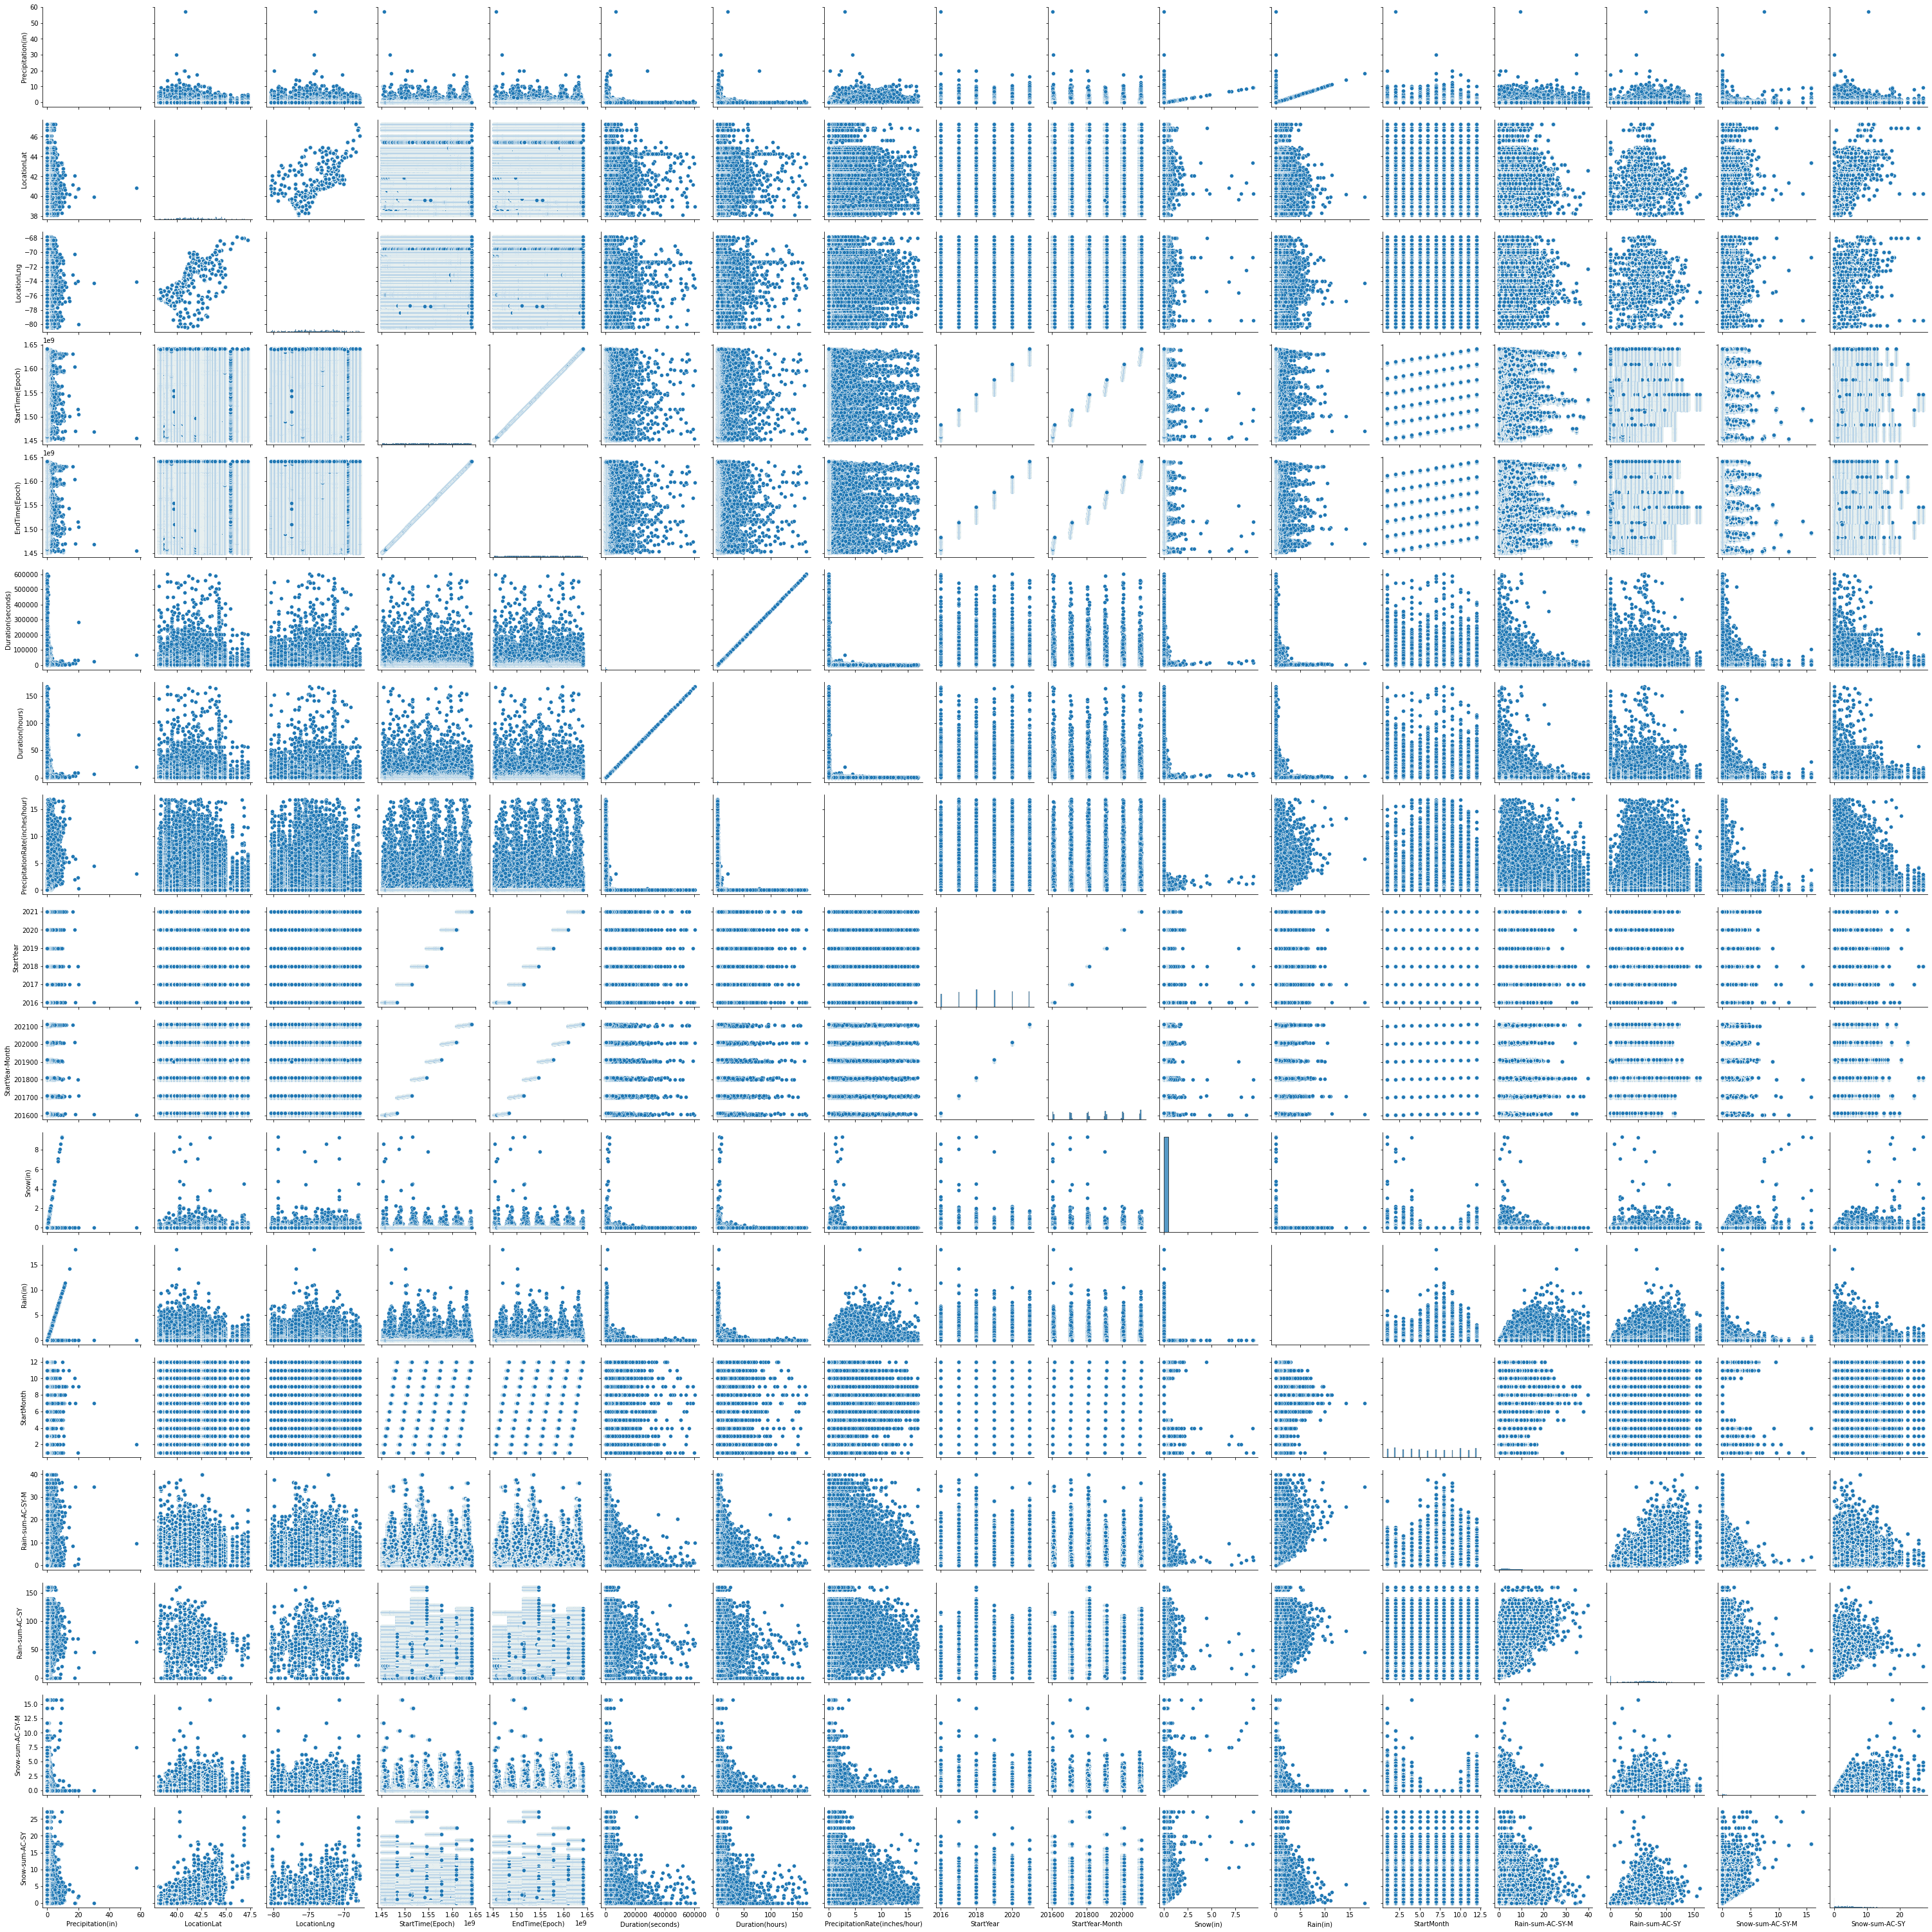

In [58]:
# Create a pair plot 

pair_plot = sns.pairplot(df_subset)

In [59]:
# Save the seaborn pairplot.
#pair_plot.figure.savefig(os.path.join(path, '04-Analysis', 'Visualizations', 'task-6.2-pairplot.png'), facecolor='white', bbox_inches='tight')

### Step 5a) Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.


### Answer:
### The only plots that show correlation are those comparing total precipitation amounts - the Precipitation(in) column - with the Duration columns.  However, while a clear line of correlation is visible, there are so many outliers that we don't see high correlation coefficients.  *This could mean that we need to separate the data further, somehow.*
### On a side note, it is reassuring to see that the scatterplots of Location Latitude vs. Location Longitude resemble maps of the 48 contiguous United States.  This would appear to confirm that we have fairly good geographical representation.
### Hopefully, once I start to investigate how the data acts over time, more correlations will appear.

# Step 6:  Create a categorical plot and interpret the results.

<AxesSubplot:xlabel='Duration(seconds)', ylabel='Count'>

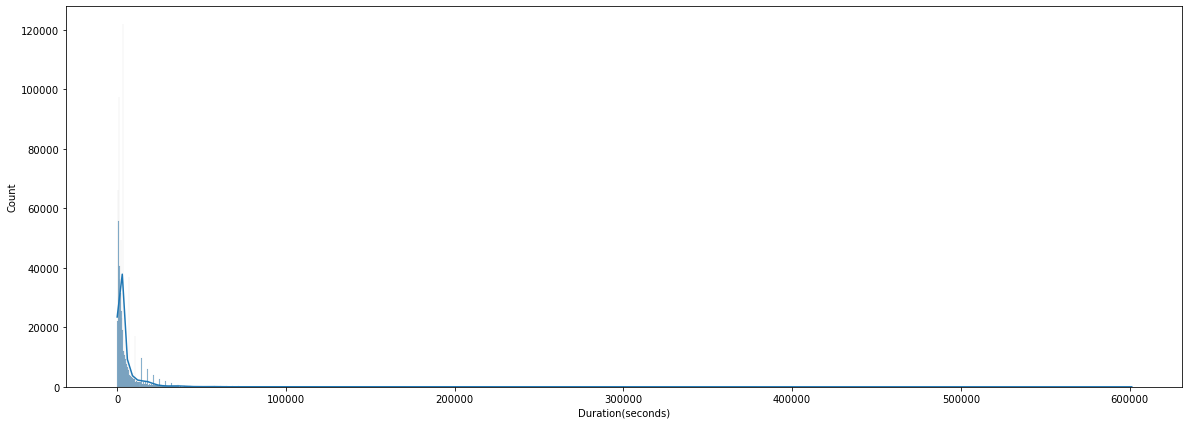

In [60]:
# Use a histogram to visualize the distribution of the 'Duration(seconds)' variable. 
# The argument "kde" adds a line that encompasses the distribution
sns.histplot(df_subset['Duration(seconds)'], bins = 2000, kde = True)

### Let's focus the histogram on durations of less than twelve hours (43,200 seconds).

<AxesSubplot:xlabel='Duration(seconds)', ylabel='Count'>

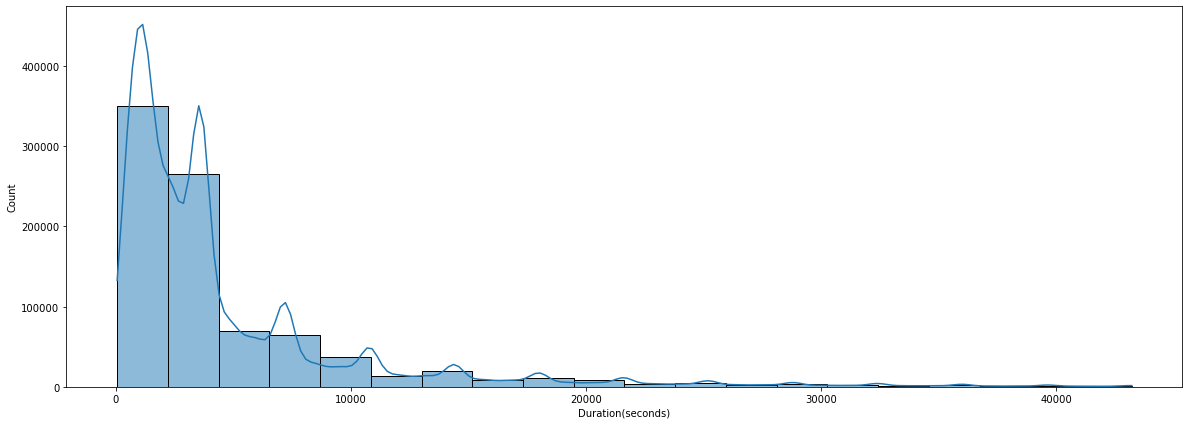

In [61]:
# Use a histogram to visualize the distribution of the 'Duration(seconds)' variable. 
# The argument "kde" adds a line that encompasses the distribution
sns.histplot(df_subset.loc[df_subset['Duration(seconds)'] <= 43200]['Duration(seconds)'], bins = 20, kde = True)

<AxesSubplot:xlabel='Precipitation(in)', ylabel='Count'>

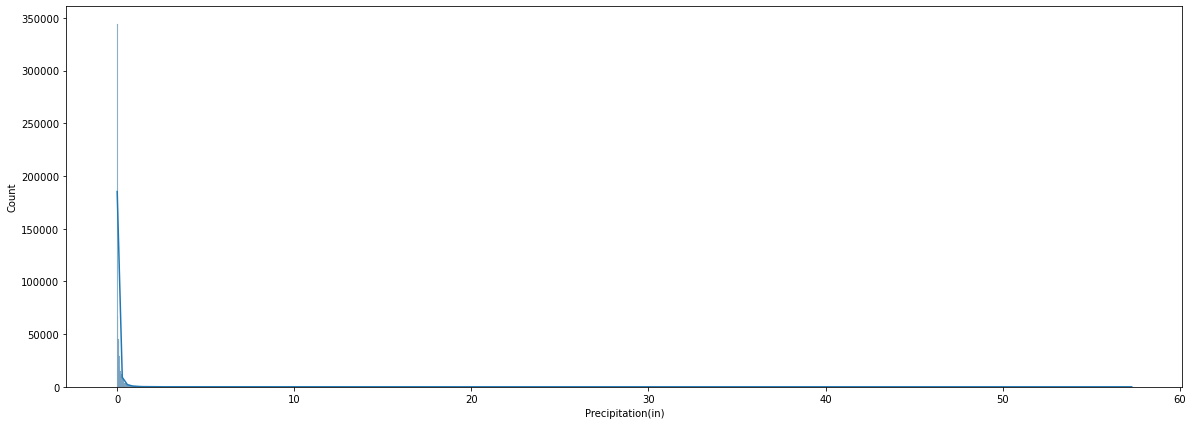

In [62]:
# Use a histogram to visualize the distribution of the 'Precipitation(in)' variable.
# NOTE:  We need to filter on events of Type 'Rain' or 'Snow' or 'Precipitation' to get non-zero amounts.
# Therefore, we need to return to using our larger 'df' dataframe, which contains the 'Type' column.
# The argument "kde" adds a line that encompasses the distribution
sns.histplot(df.loc[(df['Type'] == 'Precipitation') | (df['Type'] == 'Rain') | (df['Type'] == 'Snow')]['Precipitation(in)'], bins = 2000, kde = True)

### Can we make a more informative histogram of total precipitation by cutting out the top 25%?

In [63]:
df.loc[(df['Type'] == 'Precipitation') | (df['Type'] == 'Rain') | (df['Type'] == 'Snow')]['Precipitation(in)'].describe()

count    667877.000000
mean          0.115589
std           0.308476
min           0.000000
25%           0.000000
50%           0.020000
75%           0.120000
max          57.290000
Name: Precipitation(in), dtype: float64

### Unfortunately, the vast majority of even "wet" events have precipitation amounts under one-tenth of an inch.  It is difficult to feel confident in such measurements.

### How about *rates* of precipitation, then?

<AxesSubplot:xlabel='PrecipitationRate(inches/hour)', ylabel='Count'>

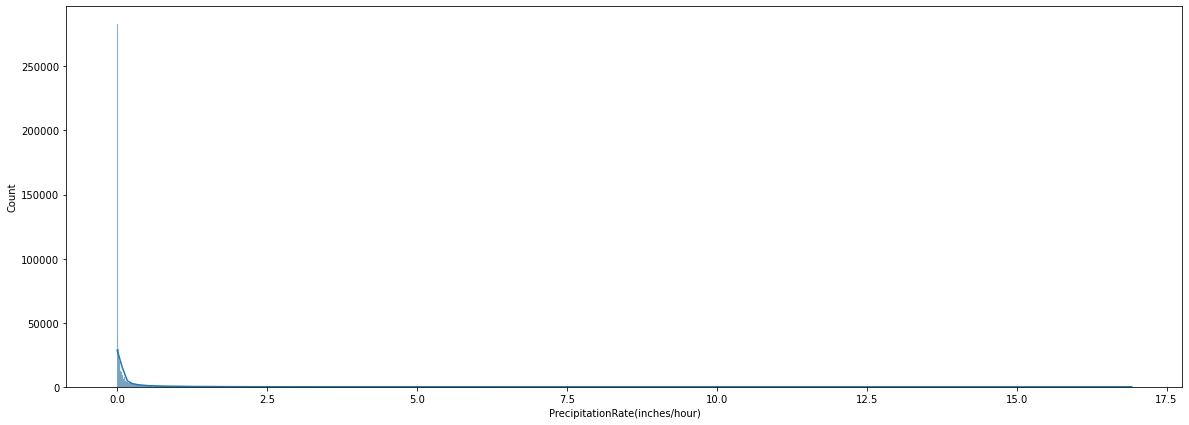

In [64]:
# Use a histogram to visualize the distribution of the 'PrecipitationRate(inches/hour)' variable. 
# NOTE:  We need to filter on events of Type 'Rain' or 'Snow' or 'Precipitation' to get non-zero amounts.
# Therefore, we need to return to using our larger 'df' dataframe, which contains the 'Type' column.
# The argument "kde" adds a line that encompasses the distribution
#sns.histplot(df_subset['PrecipitationRate(inches/hour)'], bins = 2000, kde = True)
sns.histplot(df.loc[(df['Type'] == 'Precipitation') | (df['Type'] == 'Rain') | (df['Type'] == 'Snow')]['PrecipitationRate(inches/hour)'], bins = 2000, kde = True)

### Again, we have wide-ranging values skewed toward zero.
### Again, can we make a more informative histogram of total precipitation by cutting out the top 25%?

In [65]:
df.loc[(df['Type'] == 'Precipitation') | (df['Type'] == 'Rain') | (df['Type'] == 'Snow')]['PrecipitationRate(inches/hour)'].describe()

count    667877.000000
mean          0.223934
std           0.729820
min           0.000000
25%           0.000000
50%           0.020000
75%           0.127660
max          16.920000
Name: PrecipitationRate(inches/hour), dtype: float64

### Unfortunately, the majority of even "wet" events also have precipitation *rates* under one-tenth of an inch per hour.  It is difficult to feel confident in such measurements.

# Step 7:  Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

### All questions raisde in Task 6.1 require analyzing the data over time, which we have not yet done.
### Here are the questions:
### 1) Have the frequencies, mean durations, or other characteristics of particular types of events changed over time?
### 2) How closely do latitude and longitude correlate with the frequency of particular types of events?
### 3) Do any correlation coefficients change significantly from year to year?

# Step 8:  Define any hypotheses that you can at this point. You’ll be testing these later on.

### The hypotheses will depend on time-based analysis, as well.  The current data, without correlations, does not present any obvious hypothesis to test.

# Repeating some analysis with a smaller set of columns, to make it easier to focus.

In [66]:
df.columns

Index(['EventId', 'Type', 'Severity', 'StartTime(UTC)', 'EndTime(UTC)',
       'Precipitation(in)', 'TimeZone', 'AirportCode', 'LocationLat',
       'LocationLng', 'County', 'State', 'StartTime(Epoch)', 'EndTime(Epoch)',
       'Duration(seconds)', 'Duration(hours)',
       'PrecipitationRate(inches/hour)', 'Disbelievable', 'Region',
       'StartYear', 'StartYear-Month', 'Snow(in)', 'Rain(in)', 'StartMonth',
       'Rain-sum-AC-SY-M', 'Rain-sum-AC-SY', 'Snow-sum-AC-SY-M',
       'Snow-sum-AC-SY'],
      dtype='object')

In [67]:
df_smaller_subset = df[['Duration(seconds)','Duration(hours)', 'StartYear', 'StartYear-Month', 'StartMonth', 'Snow(in)', 'Rain(in)', 'PrecipitationRate(inches/hour)']]

In [68]:
df_smaller_subset.columns

Index(['Duration(seconds)', 'Duration(hours)', 'StartYear', 'StartYear-Month',
       'StartMonth', 'Snow(in)', 'Rain(in)', 'PrecipitationRate(inches/hour)'],
      dtype='object')

In [69]:
df_smaller_subset.shape

(878241, 8)

In [70]:
df_smaller_subset.corr()

Duration(seconds)  Duration(hours)  StartYear  \
Duration(seconds)                        1.000000         1.000000  -0.003625   
Duration(hours)                          1.000000         1.000000  -0.003625   
StartYear                               -0.003625        -0.003625   1.000000   
StartYear-Month                         -0.004093        -0.004093   0.999769   
StartMonth                              -0.021870        -0.021870   0.008785   
Snow(in)                                 0.032613         0.032613   0.000138   
Rain(in)                                 0.046931         0.046931  -0.014922   
PrecipitationRate(inches/hour)          -0.091311        -0.091311   0.010407   

                                StartYear-Month  StartMonth  Snow(in)  \
Duration(seconds)                     -0.004093   -0.021870  0.032613   
Duration(hours)                       -0.004093   -0.021870  0.032613   
StartYear                              0.999769    0.008785  0.000138   
StartYear-Month                        1.000000    0.030261 -0.000937   
StartMonth                             0.030261    1.000000 -0.050043   
Snow(in)                              -0.000937   -0.050043  1.000000   
Rain(in)                              -0.013762    0.053742 -0.044371   
PrecipitationRate(inches/hour)         0.011254    0.039630  0.017733   

                                Rain(in)  PrecipitationRate(inches/hour)  
Duration(seconds)               0.046931                       -0.091311  
Duration(hours)                 0.046931                       -0.091311  
StartYear                      -0.014922                        0.010407  
StartYear-Month                -0.013762                        0.011254  
StartMonth                      0.053742                        0.039630  
Snow(in)                       -0.044371                        0.017733  
Rain(in)                        1.000000                        0.511613  
PrecipitationRate(inches/hour)  0.511613                        1.000000

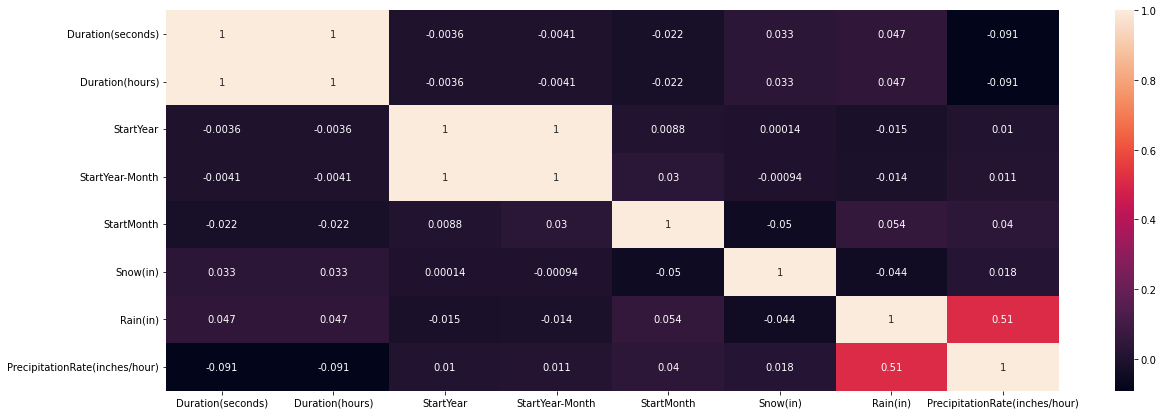

In [71]:
sns.heatmap(df_smaller_subset.corr(), annot = True)
plt.rcParams['figure.figsize'] = (20,7)
plt.show()

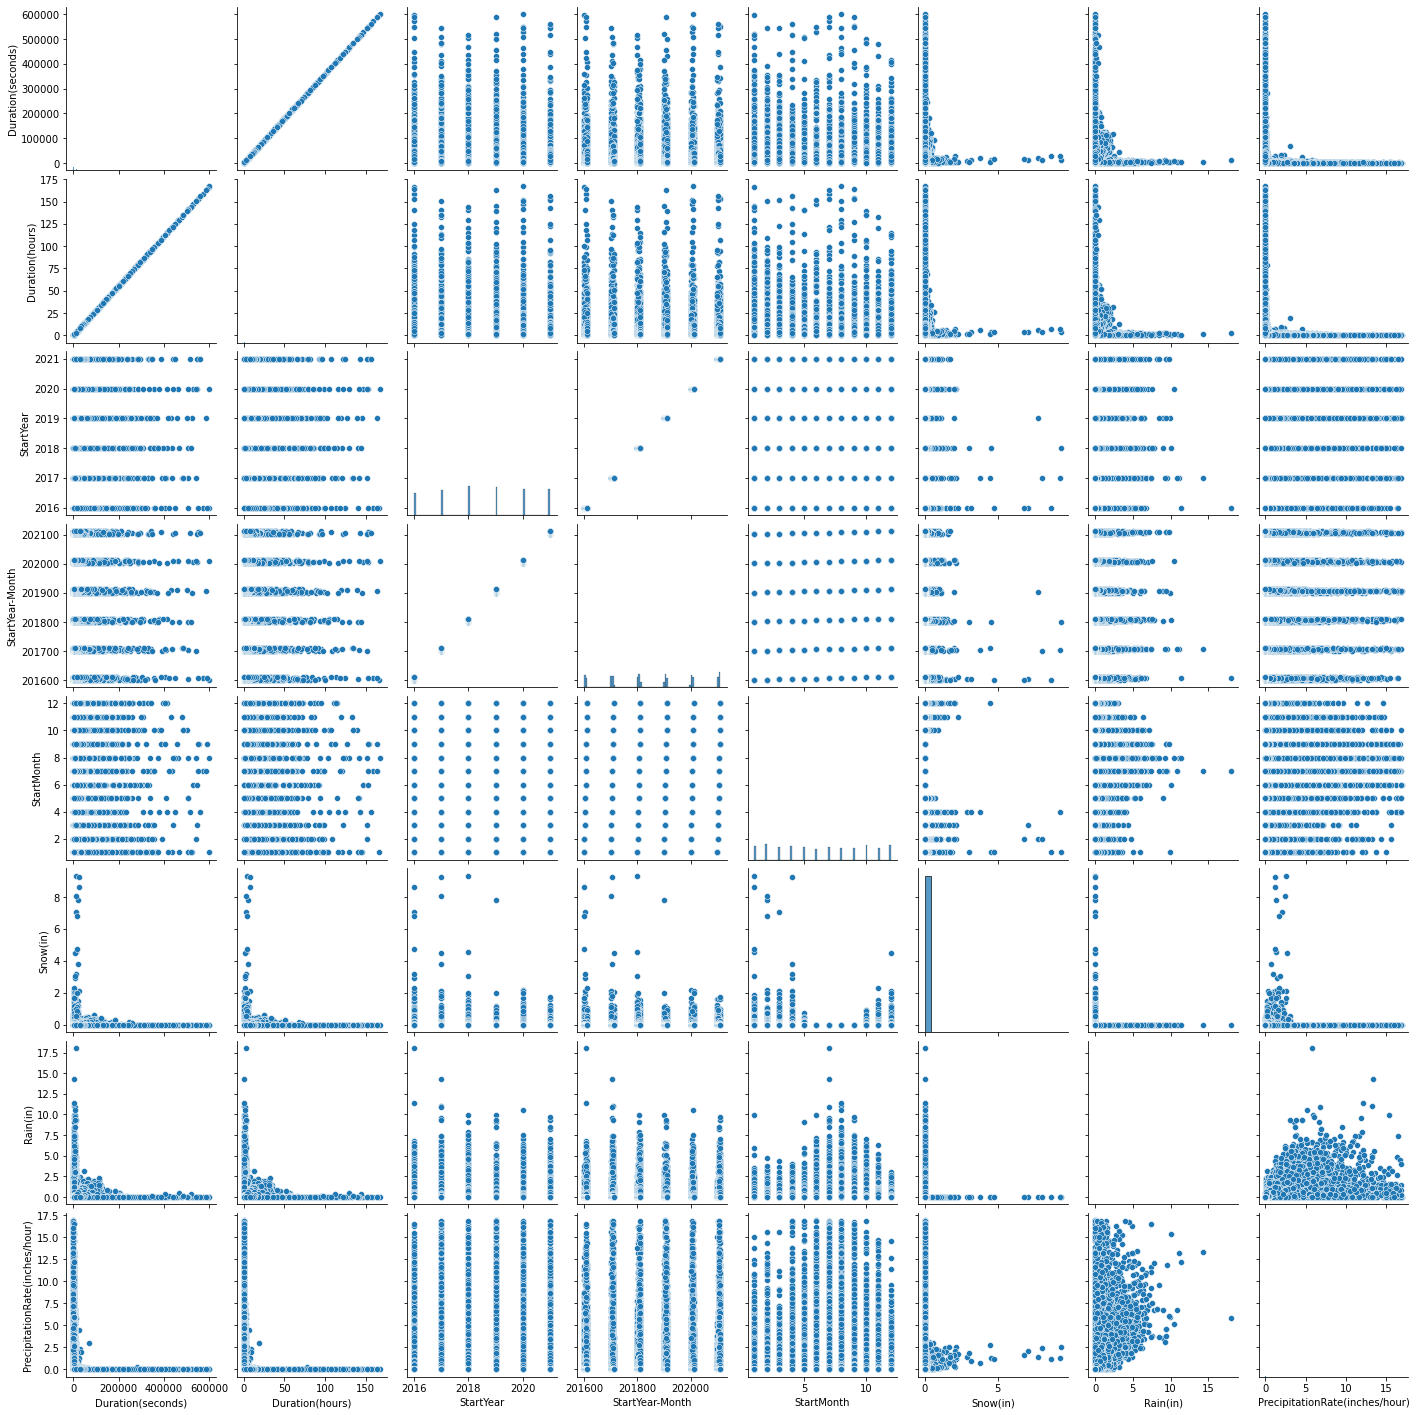

In [72]:
# Create a pair plot 

pair_plot = sns.pairplot(df_smaller_subset)

# Below this is cruft from our previous Notebook.  DO NOT EXECUTE!

In [73]:
# MAKE SURE WE STOP, BY PRETENDING THE USER HIT CTRL-C.
raise KeyboardInterrupt("Stop execution here")

KeyboardInterrupt: Stop execution here

In [ ]:
# Test to make sure this interruption code really works!
print ("Oh crap, we're still going!"

# STOP.  DO NOT EXECUTE ANY CELLS BELOW THIS ONE.

In [ ]:
# Let's save the new Dataframes created in this Task.

In [ ]:
df_no_city_zip.to_pickle(os.path.join(path, '02-Data','Prepared-Data', 'plausible_no_cities_or_zipcodes.Task-6.2.pkl'))

In [ ]:
df_subset.to_pickle(os.path.join(path, '02-Data','Prepared-Data', 'numerical_subset_of_plausible_no_cities_or_zipcodes.Task-6.1.pkl'))

# Addendum:  Splitting the dataset by Climatic Region
### According to the National Oceanic and Atmospheric Administration's (NOAA) National Centers for Environmental Information (NCEI), the area of the contiguous United States can be divided into nine distinct climatic regions, each comprising a group of states:

### 1) Northeast:  Connecticut, Delaware, Maine, Maryland, Massachusetts, New Hampshire, New Jersey, New York, Pennsylvania, Rhode Island, Vermont
### 2) Upper Midwest:  Iowa, Michigan, Minnesota, Wisconsin
### 3) Ohio Valley:  Illinois, Indiana, Kentucky, Missouri, Ohio, Tennessee, West Virginia
### 4) Southeast:  Alabama, Florida, Georgia, North Carolina, South Carolina, Virginia
### 5) Northern Rockies and Plains:  Montana, Nebraska, North Dakota, South Dakota, Wyoming
### 6) South:  Arkansas, Kansas, Louisiana, Mississippi, Oklahoma, Texas
### 7) Southwest:  Arizona, Colorado, New Mexico, Utah
### 8) Northwest:  Idaho, Oregon, Washington
### 9) West:  California, Nevada

### From https://www.ncei.noaa.gov/access/monitoring/reference-maps/us-climate-regions :
#### "Through climate analysis, National Centers for Environmental Information scientists have identified nine climatically consistent regions within the contiguous United States which are useful for putting current climate anomalies into a historical perspective (Karl and Koss, 1984)."
##### Source:  Thomas R. Karl and Walter James Koss, 1984: "Regional and National Monthly, Seasonal, and Annual Temperature Weighted by Area, 1895-1983." Historical Climatology Series 4-3, National Climatic Data Center, Asheville, NC, 38 pp.


## The dataset studied in Tasks 6.1 and 6.2 may be better analyzed by dividing based on the climatic region of each state.

In [ ]:
# Define our regions based on the description above; our dataset uses two-letter abbreviations, which I generated manually.

In [ ]:
reg_1_ne = ['CT', 'DE', 'ME', 'MD', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT']
reg_2_umw = ['IA', 'MI', 'MN', 'WI']
reg_3_ov = ['IL', 'IN', 'KY', 'MO', 'OH', 'TN', 'WV']
reg_4_se = ['AL', 'FL', 'GA', 'NC', 'SC', 'VA']
reg_5_nrap = ['MT', 'NE', 'ND', 'SD', 'WY']
reg_6_s = ['AR', 'KS', 'LA', 'MS', 'OK', 'TX']
reg_7_sw = ['AZ', 'CO', 'NM', 'UT']
reg_8_nw = ['ID', 'OR', 'WA']
reg_9_w = ['CA', 'NV']

In [ ]:
# Build a new 'Region' column based on matches for these groups of states.

In [ ]:
df_no_city_zip.loc[df_no_city_zip['State'].isin(reg_1_ne), 'Region'] = 'Northeast'
df_no_city_zip.loc[df_no_city_zip['State'].isin(reg_2_umw), 'Region'] = 'Upper Midwest'
df_no_city_zip.loc[df_no_city_zip['State'].isin(reg_3_ov), 'Region'] = 'Ohio Valley'
df_no_city_zip.loc[df_no_city_zip['State'].isin(reg_4_se), 'Region'] = 'Southeast'
df_no_city_zip.loc[df_no_city_zip['State'].isin(reg_5_nrap), 'Region'] = 'Northern Rockies and Plains'
df_no_city_zip.loc[df_no_city_zip['State'].isin(reg_6_s), 'Region'] = 'South'
df_no_city_zip.loc[df_no_city_zip['State'].isin(reg_7_sw), 'Region'] = 'Southwest'
df_no_city_zip.loc[df_no_city_zip['State'].isin(reg_8_nw), 'Region'] = 'Northwest'
df_no_city_zip.loc[df_no_city_zip['State'].isin(reg_9_w), 'Region'] = 'West'

In [ ]:
# Let's assign this modified dataframe a new name.

In [ ]:
df_all_states_regions = df_no_city_zip

In [ ]:
# Quick sanity-checks of the new dataframe.

In [ ]:
df_all_states_regions.shape

In [ ]:
df_all_states_regions.head()

In [ ]:
df_all_states_regions.tail()

In [ ]:
# Save the df_all_states_regions dataframe for future loading, even though I doubt we'll use it.

In [ ]:
df_all_states_regions.to_pickle(os.path.join(path, '02-Data','Prepared-Data', 'df_all_states_regions.Task-6.2.pkl'))

## Split the df_all_states_regions dataframe into a separate dataframe for each region.  This offers two advantages.
## 1) Each region can be analyzed separately for correlations and trends.
## 2) CPU-intensive operations can be run for reach region in a separate Jupyter Notebook, allowing us to take advantage of multiple CPUs for simultaneous processing, avoiding the singl-CPU bottleneck.

In [ ]:
for region_name in df_all_states_regions['Region'].unique():
    # Replace uppercase letters with lowercase letters
    region_code = region_name.lower()
    
    # Replace spaces with underscores
    region_code = region_code.replace(' ', '_')
    
    # Create a new dataframe and assign it to a dynamically generated variable name
    globals()['df_' + region_code] = df_all_states_regions.loc[df_all_states_regions['Region'] == region_name]
    
    print ('df_' + region_code)
    print(globals()['df_' + region_code].shape)
    
    # Save each new dataframe to a pickle file.
    globals()['df_' + region_code].to_pickle(os.path.join(path, '02-Data','Prepared-Data', 'df_' + region_code + '.Task-6.2.pkl'))
    print()